# Flywheel Notebook Conveniences

This notebook lists all the conveniences that are available in the Flywheel Notebook
---

### Publishing notebooks

The flywheel workspace can be published by going to `File -> Publish To Flywheel`.  Workspaces must be published in order to persist across starting and stopping of workspaces.  The `Data` directory is intended to be a temporary working directory, anydata saved there will not be persisted as part of `Publish to Flywheel` automatically. This is a good place to store:
* input data from Flywheel you do not want replicated in the workspace because it already exists in Flywheel
* input files loaded from cloud storage
* temporary files you don't need preserved

---

### Pre-installed Flywheel CLI

The [Flywheel CLI](https://docs.flywheel.io/hc/en-us/articles/4536067900435-Command-Line-Interface-Overview) can be used in the Jupyter terminal.  Logging in can be done using `fw login $FW_HOSTNAME":"$FW_WS_API_KEY`

---

### Preconfigured flywheel_client

The `fw` variable is pre-initialized with your user credentials, so you don't need to provide this.  Below is an example usage:

In [1]:
fw.get_current_user().id

'username@gmail.com'

### Preloaded project object

The environment is also preloaded with flywheel project info from the flywheel project the workspace is in.  This exists under `fw.workspace_project` and `fw_project`

In [2]:
fw_project.label

'MedNIST'

### Preconfigured Flywheel Storage Client

A [fw-storage client](https://gitlab.com/flywheel-io/tools/lib/fw-storage) is already installed and so it allows for interaction with configured Flywheel External Storage.  Provided as `fs`.  Below is an example of uploading an image from the `~/Data` dir to a cloud storage bucket and then downloading it and displaying it.

#### Get a test image
Get a test image from the web and save in the `Data` directory.

1. ASUNI N, GIACHETTI A, "TESTIMAGES: A Large Data Archive For Display and Algorithm Testing", Journal of Graphics Tools, Volume 17, Issue 4, 2015, pages 113-125, DOI:10.1080/2165347X.2015.1024298
2. ASUNI N, GIACHETTI A, "TESTIMAGES: a large-scale archive for testing visual devices and basic image processing algorithms", STAG - Smart Tools & Apps for Graphics Conference, 2014.

In [54]:
import requests
url ="https://testimages.org/img/testimages_screenshot.jpg"
img_data = requests.get(url).content
with open('Data/image.jpg', 'wb') as handler:
    handler.write(img_data)

#### Writing to the storage bucket

Use the following to send to preconfigured cloud storage bucket.

In [55]:
fs.set("test/image.jpg", "./Data/image.jpg")

#### Reading from the storage bucket

Run the following snippet to download your image and then display it

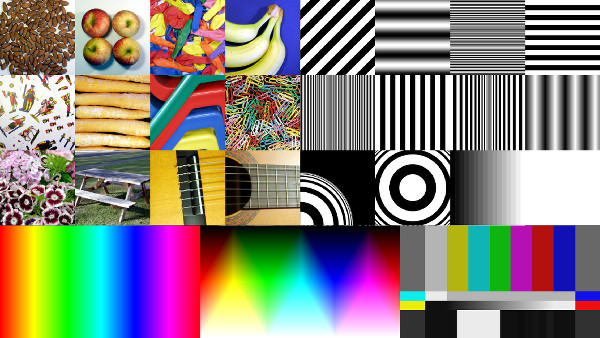

In [56]:
f = fs.get("test/image.jpg")

content = f.read()

from IPython.display import Image

display(Image(content))